In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
images, labels = next(iter(train_loader))

100%|██████████| 26421880/26421880 [00:02<00:00, 11026837.90it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 216784.66it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3150448.76it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6151645.87it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



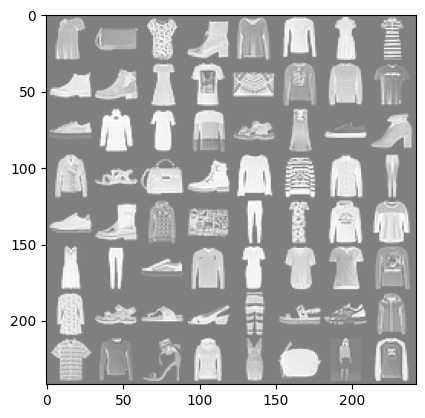

In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

imshow(torchvision.utils.make_grid(images))

In [ ]:
class CNN_Net(nn.Module):
    def __init__(self, num_classes):
      super(CNN_Net, self).__init__()
      self.CNN1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=1)
      self.CNN2 = nn.MaxPool2d(kernel_size=2, stride=2)
      self.CNN3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=1)
      self.CNN4 = nn.MaxPool2d(kernel_size=2, stride=2)
      self.fc1 = nn.Linear(64*5*5, 128)
      self.fc2 = nn.Linear(128, 64)
      self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
      x1 = nn.ReLU()(self.CNN1(x))
      x2 = nn.ReLU()(self.CNN2(x1))
      x3 = nn.ReLU()(self.CNN3(x2))
      x4 = nn.ReLU()(self.CNN4(x3))
      x5 = x4.view(-1, 64*5*5)
      x6 = nn.ReLU()(self.fc1(x5))
      x7 = nn.Dropout(0)(x6)
      x8 = nn.ReLU()(self.fc2(x7))
      x9 = nn.Dropout(0)(x8)
      x10 = nn.LogSoftmax(dim=1)(self.fc3(x9))

      return x10


In [ ]:
my_CNN = CNN_Net(10)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_CNN.parameters(), lr=0.001)

In [ ]:
loss_track = []
for i in range(10):
  for images, labels in train_loader:
    images = images.view(-1, 1, 28, 28)
    optimizer.zero_grad()
    outputs = my_CNN(images)
    loss_value = loss(outputs, labels)
    loss_value.backward()
    optimizer.step()
  loss_track.append(loss_value)
  print('epoch: ', i, 'loss: ', loss_value.item())

epoch:  0 loss:  0.14921337366104126
epoch:  1 loss:  0.24414223432540894
epoch:  2 loss:  0.27624353766441345
epoch:  3 loss:  0.3055839240550995
epoch:  4 loss:  0.2612951099872589
epoch:  5 loss:  0.17291422188282013
epoch:  6 loss:  0.12706206738948822
epoch:  7 loss:  0.06243335083127022
epoch:  8 loss:  0.24079738557338715
epoch:  9 loss:  0.10874152183532715


In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
correct = 0.0
total = 0.0

with torch.no_grad():
  for images, labels in test_loader:
    images = images.view(-1, 1, 28, 28)
    outputs = my_CNN(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 91.500000 %


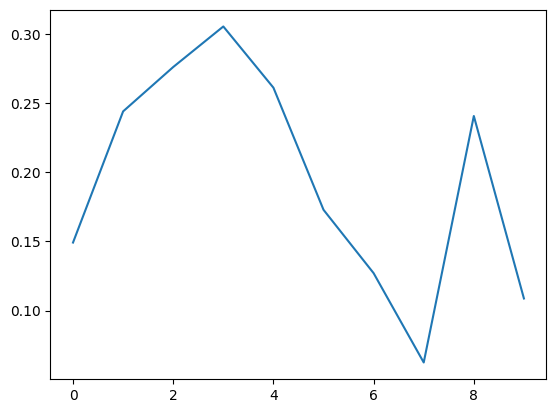

In [ ]:
loss_track_numpy = []
for i in loss_track:
  loss_track_numpy.append(i.item())
plt.plot(loss_track_numpy[0:500])
plt.show()

In [ ]:
# ()- Represents pool size
# Learning rate  Softmax  Epochs   Kernel size   Batch size   CNN sizes      MLP Sizes          Droupout    Accuracy
# 0.001          0        10       3             64           32,(2),32,(2)  32*7*7,128,10      0           91.16
# 0.001          0        10       3             64           32,(2),32,(2)  32*7*7,128,64,10   0           91.95
# 0.001          1        10       3             64           32,(2),32,(2)  32*7*7,128,64,10   0           90.06
# 0.001          log      10       3             64           32,(2),32,(2)  32*7*7,128,64,10   0           91.57
# 0.001          log      10       3             64           32,(2),32,(2)  32*7*7,128,128,10  0           92.04
# 0.001          log      10       3             64           32,(2),32,(2)  32*7*7,128,128,10  0.5,0       90.50
# 0.001          log      10       3             64           32,(2),32,(2)  32*7*7,128,64,10   0.5,0       89.27
# 0.001          log      10       5             64           32,(2),32,(2)  32*5*5,128,64,10   0.5,0       89.85
# 0.001          log      10       5             64           32,(2),64,(2)  64*5*5,128,64,10   0.5,0       90.27
# 0.001          log      10       5             64           32,(2),64,(2)  64*5*5,128,64,10   0.5,0.25    90.06
# 0.001          log      10       5             64           32,(2),64,(2)  64*5*5,128,128,10  0.5,0.25    90.20
# 0.001          log      10       5             64           32,(2),64,(2)  64*5*5,128,64,10   0,0         91.50